In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.layers import Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D

<h2> Sequential API vs Functional API </h2>

<h3> Sequential API</h3>

<h4> PROS</h4>

<p style="font-size:18px">Sequential API is easy to use</p>
<p style="font-size:18px">allow you to create models layer-layer by stacking them</p>

<h4>CONS</h4>

<p style="font-size:18px">Difficult to make models with multi-input, multi_output or shared_layer.Not flexible for network that need Merge Layers,Concatenate Layers, Add Layers</p>

<h3> Sequential API</h3>

<h4> PROS</h4>

<p style="font-size:18px">Flexible model architecture (each layer can be connected in a pairwise fashion).</p>
<p style="font-size:18px">Can create complex 
    network such as Residual Network.</p>

<h4> CONS</h4>

<p style="font-size:18px">Needs a Standalone “Input” layer at the top to specify input shape.</p>

<b style="font-size:16px"> And there is also a third way to make a model with tensorflow which is model subclassing </b> 

In [33]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [18]:
input_layer = keras.Input(shape=(32,32,3))
x = Conv2D(64,(5,5),activation = "relu",padding="same")(input_layer)
x = MaxPooling2D((2,2))(x)

x = BatchNormalization()(x)
x = Conv2D(128,(5,5),activation = "relu",padding="same")(x)
x = MaxPooling2D((2,2))(x)

x = BatchNormalization()(x)
x = Conv2D(256,(5,5),activation = "relu",padding="same")(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
output_layer = Dense(10,activation="softmax")(x)

model = keras.Model(input_layer,output_layer,name="cifar_classification")

In [19]:
model.summary()

Model: "cifar_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        4864      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       204928    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128

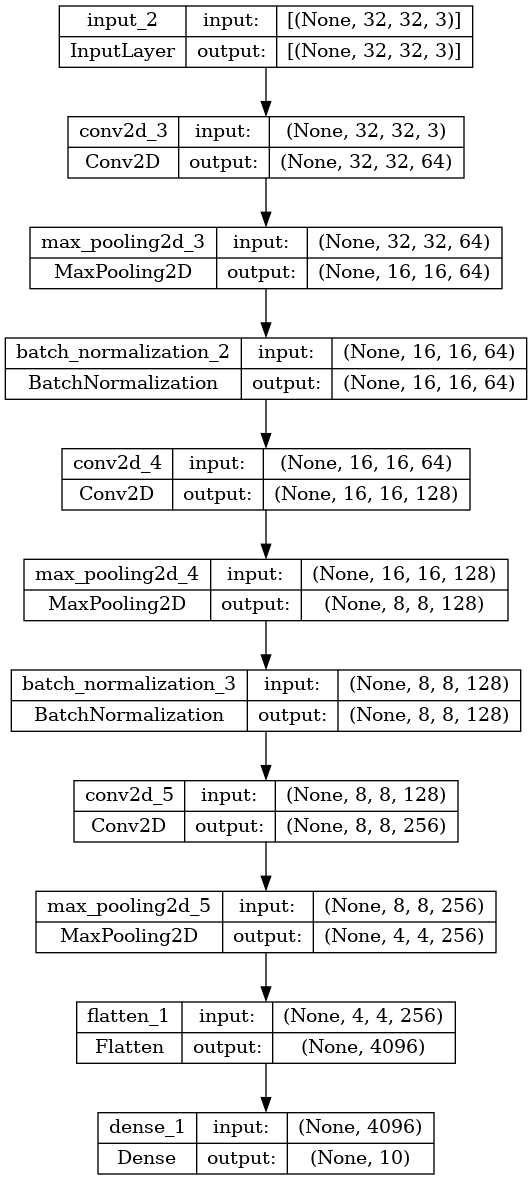

In [20]:
keras.utils.plot_model(model,show_shapes = True)

In [32]:
model.compile(optimizer="Adam",
             loss="sparse_categorical_crossentropy",
             metrics = ["Accuracy"])

In [41]:
history = model.fit(x_train,y_train,batch_size = 32, epochs = 3, validation_split=0.2)

Epoch 1/3
1250/1250 [==============================] - 11s 9ms/step - loss: 0.4000 - Accuracy: 0.8864 - val_loss: 1.8515 - val_Accuracy: 0.6312
Epoch 2/3
1250/1250 [==============================] - 10s 8ms/step - loss: 0.2134 - Accuracy: 0.9366 - val_loss: 2.0640 - val_Accuracy: 0.6975
Epoch 3/3
1250/1250 [==============================] - 10s 8ms/step - loss: 0.1800 - Accuracy: 0.9464 - val_loss: 1.8257 - val_Accuracy: 0.6739


In [42]:
test_scores = model.evaluate(x_test,y_test,verbose=2)
print("loss value is",test_scores[0])
print("accuracy value is",test_scores[1])

# Train datası üzerindeki accuracy değeri 0.96 gelmişken test datası üzerinde 0.63 geldi
# Train datası üzerindeki loss değeri 0.11 gelmişken test datası üzerinde 2.31 geldi
# Buradan datanın overfittinge uğradığını çıkartabiliriz.

313/313 - 1s - loss: 1.8979 - Accuracy: 0.6695 - 1s/epoch - 4ms/step
loss value is 1.8978852033615112
accuracy value is 0.6694999933242798
